In [ ]:
## I didn't attend

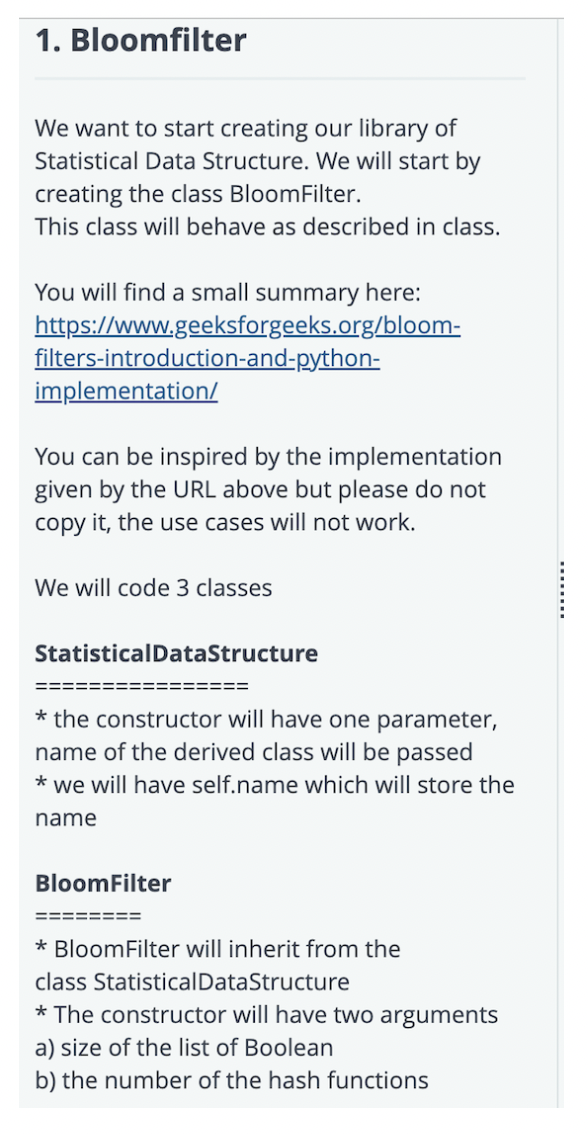
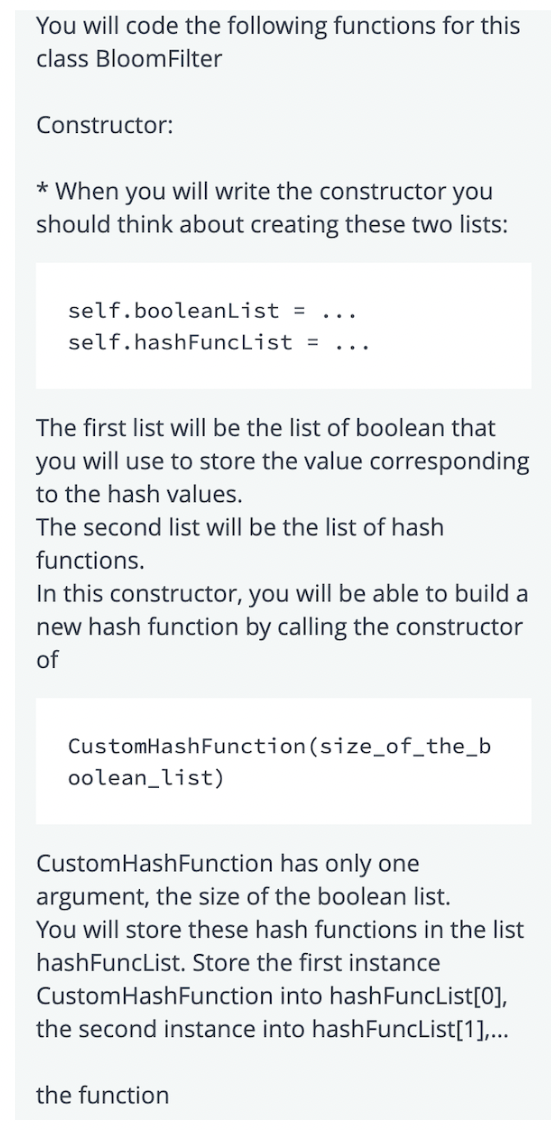
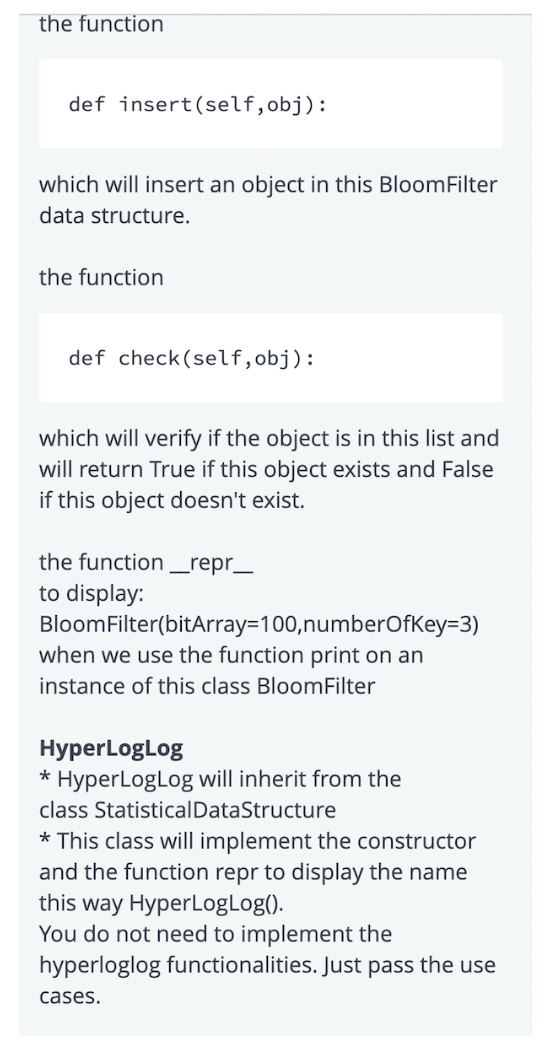

In [ ]:
#Q1

class StatisticalDataStructure:
    def __init__(self, name):
        self.name = name
        
    
class HyperLogLog(StatisticalDataStructure):
    def __init__(self):
        # self.name = self.__class__.__name__
        super().__init__(self.__class__.__name__)
    
    def __repr__(self):
        return self.name + '()'
    
class BloomFilter(StatisticalDataStructure):
    def __init__(self, size, number):
        self.bool_size = size
        self.booleanList = [False for _ in range(size)]
        self.hash_number = number
        self.hashFuncList = [CustomHashFunction(size) for _ in range(number)]
        super().__init__(self.__class__.__name__)
    
    def insert(self, obj):
        for i in range(self.hash_number):
            b = self.hashFuncList[i].convert(obj) % self.bool_size
            self.booleanList[b] = True
    
    def check(self, obj):
        for i in range(self.hash_number):
            b = self.hashFuncList[i].convert(obj) % self.bool_size
            if self.booleanList[b] == False:
                return False
        return True

    def __repr__(self):
        return self.name + f"(bitArray={self.bool_size},numberOfKey={self.hash_number})"

In [ ]:
#Q2
#
# Complete the 'maxPresentations' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER_ARRAY scheduleStart
#  2. INTEGER_ARRAY scheduleEnd
#
from collections import defaultdict
def maxPresentations(scheduleStart, scheduleEnd):    
    schedule = defaultdict(int)
    for i in range(len(scheduleStart)):
        if not schedule[scheduleStart[i]]:
            schedule[scheduleStart[i]] = scheduleEnd[i]
        else:
            schedule[scheduleStart[i]] = min(schedule[scheduleStart[i]], scheduleEnd[i])
        
    schedule = sorted(schedule.items(), key= lambda x: x[1])
    res = 1
    current_end = schedule[0][1]
    for start, end in schedule[1:]:
        if start >= current_end:
            res +=1
            current_end = end
    return res